In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score


In [158]:
df=pd.read_csv('C:/Users/arunm/OneDrive/Documents/food/synthetic_food_dataset_imbalanced.csv')

In [159]:
df.head(10)

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
5,264.565349,13.211820,13.835274,35.048055,5.918733,2.403751,666.134441,43.988950,64.200334,41.459704,178.408325,breakfast,raw,False,False,Burger
6,229.263615,2.187771,9.844101,26.820159,22.261039,0.549310,72.662463,29.365213,66.916522,50.411927,100.815475,snack,baked,False,True,Ice Cream
7,188.765957,2.486270,9.479713,21.365235,19.171841,0.673345,86.428561,36.619752,59.062833,54.007529,89.068188,breakfast,grilled,False,True,Ice Cream
8,342.055223,28.252271,28.557273,0.000000,0.000000,0.000000,87.904401,79.949005,0.957229,54.259188,192.960366,snack,grilled,False,True,Steak
9,349.875140,14.279346,17.966512,33.325020,6.907501,0.444209,740.477217,32.609281,75.015328,48.580038,174.061567,breakfast,raw,False,False,Burger


In [160]:
df.tail()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta
31699,203.952826,5.322650,13.419346,26.686660,14.645211,0.295026,62.468736,38.417093,57.987511,51.156165,113.912626,breakfast,grilled,False,True,Ice Cream


In [161]:
df.sample(15)

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
27428,297.022439,8.693096,11.069836,43.105054,3.196323,2.735805,21.068113,7.950060,79.027023,40.142771,139.879913,snack,grilled,False,False,Pasta
8398,337.828948,9.827774,7.289849,40.943418,2.496151,0.676053,4.336639,9.760809,60.483098,42.046048,151.495928,lunch,grilled,False,False,Pasta
15769,354.268100,14.204364,24.051435,34.583079,5.337242,2.990130,715.653703,39.191863,64.780500,41.879220,183.439683,dinner,raw,False,False,Burger
11606,268.168472,3.010148,16.615747,36.506826,13.555955,0.932654,322.232687,20.138911,75.021253,20.245624,74.434207,dinner,baked,False,False,Donut
1581,114.488289,1.517182,0.543524,23.744875,12.449654,2.703883,1.006206,0.000000,55.894988,67.702665,112.142437,snack,grilled,True,True,Banana
31607,192.883743,8.559162,6.055018,27.559748,5.010956,1.942764,320.422338,20.332570,72.619516,44.484239,132.925673,snack,fried,False,True,Sushi
404,320.416403,11.456750,20.460485,40.238465,6.058767,2.618421,594.617426,40.761898,68.563375,42.816960,171.755527,breakfast,fried,False,False,Burger
13259,399.708506,29.780600,31.755788,0.170870,0.000000,0.000000,75.593012,82.036570,0.000000,61.621926,199.578496,lunch,raw,False,True,Steak
29607,343.017918,21.889045,17.251560,37.699887,4.935964,0.718202,671.638869,45.350783,63.658273,51.383488,162.104295,dinner,baked,False,False,Burger
20432,352.751947,6.481011,13.262967,40.730237,1.992448,0.549387,13.876374,10.518949,58.584970,44.397054,144.308883,breakfast,fried,False,False,Pasta


In [162]:
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [163]:
df.shape

(31700, 16)

In [164]:
df['Food_Name'].value_counts()

Food_Name
Pizza        6000
Burger       5000
Donut        4500
Pasta        4000
Sushi        3500
Ice Cream    3000
Steak        2000
Apple        1500
Banana       1200
Salad        1000
Name: count, dtype: int64

In [165]:
df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [166]:
df.duplicated().sum()

np.int64(313)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [168]:
df["Is_Vegan"].value_counts()


Is_Vegan
False    28000
True      3700
Name: count, dtype: int64

In [169]:
bool_cols = df.select_dtypes(include="bool").columns

df[bool_cols] = df[bool_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  int64  
 14  Is_Gluten_Free      31700 non-null  int64  
 15  Food_Name           31700 non-null  object 
dtypes: f

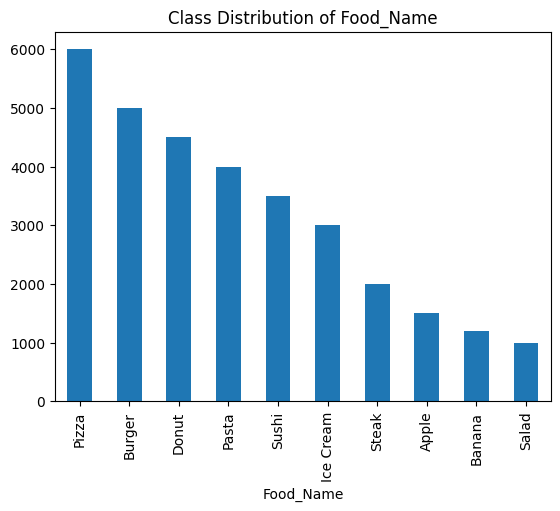

In [170]:
##check imbalance 
plt.figure()
df["Food_Name"].value_counts().plot(kind="bar")
plt.title("Class Distribution of Food_Name")
plt.show()


In [171]:
##Visualize Inter-Class Variation

In [172]:
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

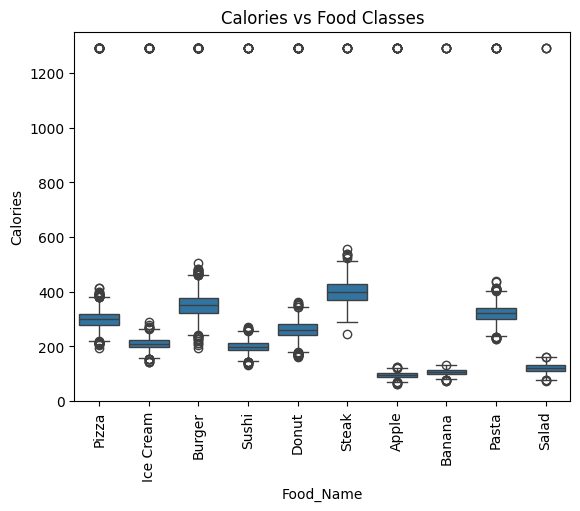

In [173]:
plt.figure()
sns.boxplot(x="Food_Name", y="Calories", data=df)
plt.xticks(rotation=90)
plt.title("Calories vs Food Classes")
plt.show()


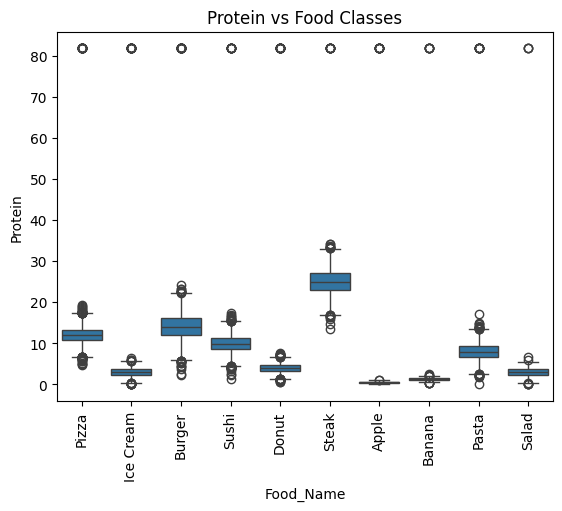

In [174]:
plt.figure()
sns.boxplot(x="Food_Name", y="Protein", data=df)
plt.xticks(rotation=90)
plt.title("Protein vs Food Classes")
plt.show()

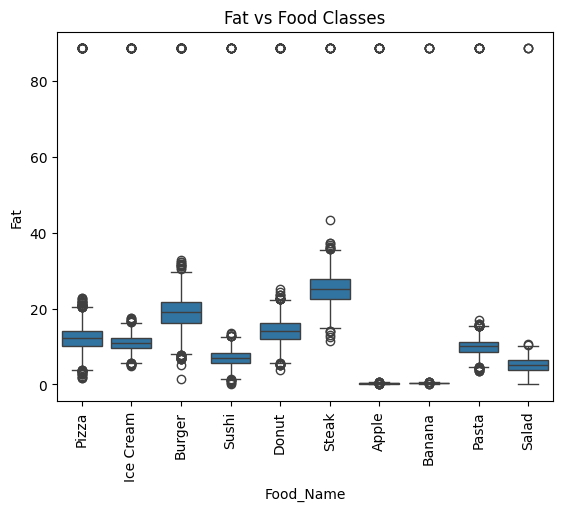

In [175]:
plt.figure()
sns.boxplot(x="Food_Name", y="Fat", data=df)
plt.xticks(rotation=90)
plt.title("Fat vs Food Classes")
plt.show()

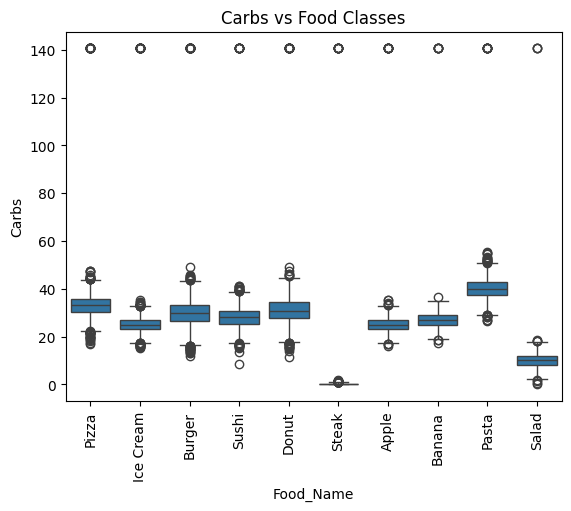

In [176]:
plt.figure()
sns.boxplot(x="Food_Name", y="Carbs", data=df)
plt.xticks(rotation=90)
plt.title("Carbs vs Food Classes")
plt.show()

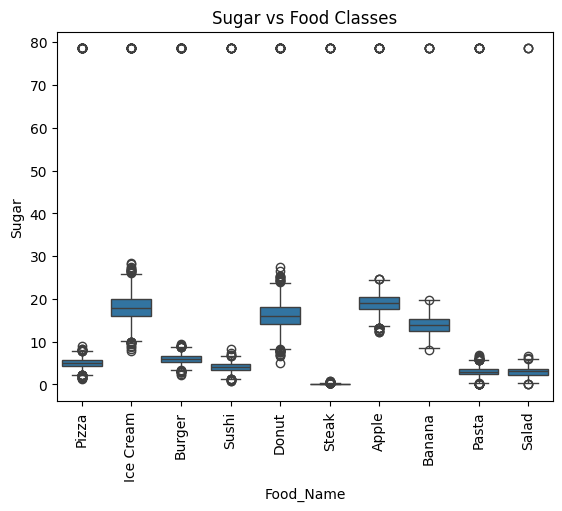

In [177]:
plt.figure()
sns.boxplot(x="Food_Name", y="Sugar", data=df)
plt.xticks(rotation=90)
plt.title("Sugar vs Food Classes")
plt.show()

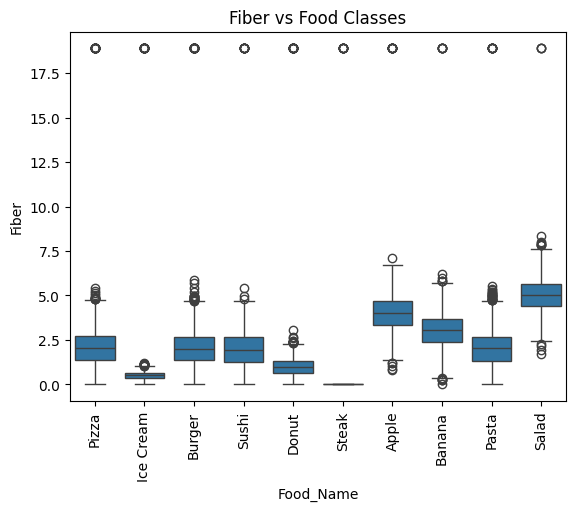

In [178]:
plt.figure()
sns.boxplot(x="Food_Name", y="Fiber", data=df)
plt.xticks(rotation=90)
plt.title("Fiber vs Food Classes")
plt.show()

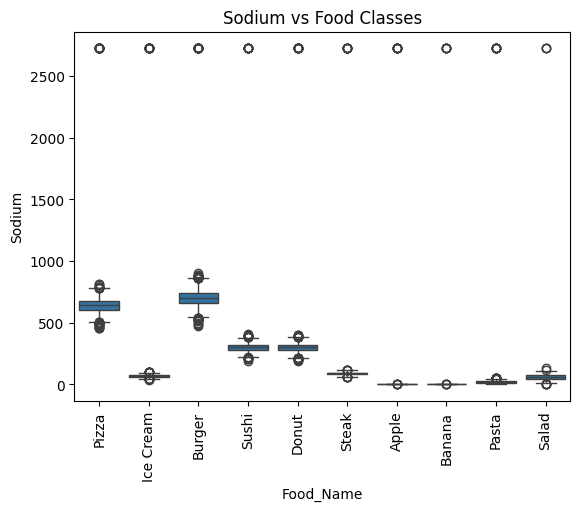

In [179]:
plt.figure()
sns.boxplot(x="Food_Name", y="Sodium", data=df)
plt.xticks(rotation=90)
plt.title("Sodium vs Food Classes")
plt.show()

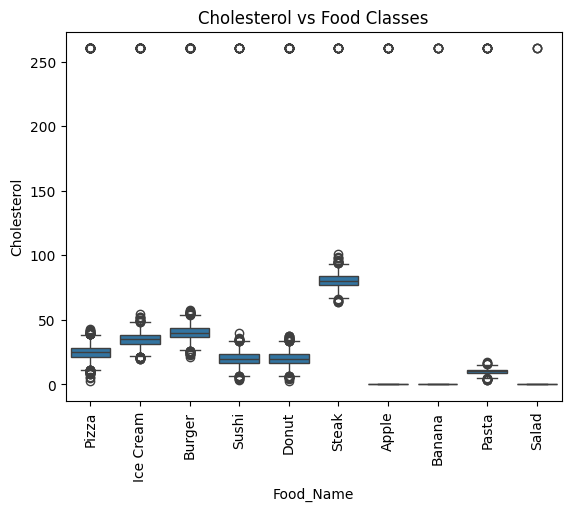

In [180]:
plt.figure()
sns.boxplot(x="Food_Name", y="Cholesterol", data=df)
plt.xticks(rotation=90)
plt.title("Cholesterol vs Food Classes")
plt.show()

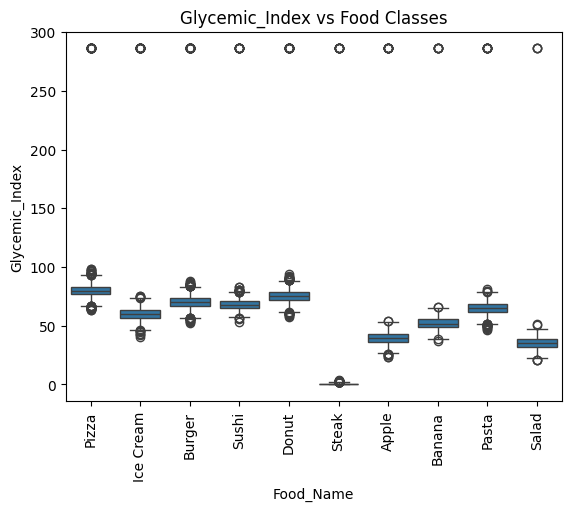

In [181]:
plt.figure()
sns.boxplot(x="Food_Name", y="Glycemic_Index", data=df)
plt.xticks(rotation=90)
plt.title("Glycemic_Index vs Food Classes")
plt.show()

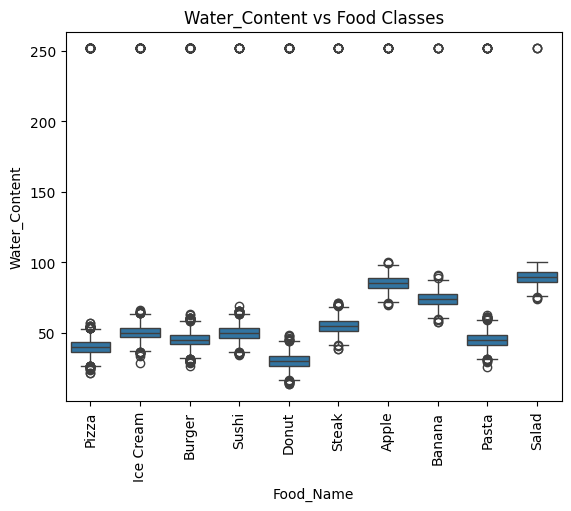

In [182]:
plt.figure()
sns.boxplot(x="Food_Name", y="Water_Content", data=df)
plt.xticks(rotation=90)
plt.title("Water_Content vs Food Classes")
plt.show()

In [183]:
df['Meal_Type'].value_counts()

Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64

In [184]:
df['Preparation_Method'].value_counts()


Preparation_Method
baked      8048
grilled    7955
raw        7941
fried      7756
Name: count, dtype: int64

In [185]:
df['Is_Vegan'].value_counts()


Is_Vegan
0    28000
1     3700
Name: count, dtype: int64

In [186]:
df['Is_Gluten_Free'].value_counts()


Is_Gluten_Free
0    19500
1    12200
Name: count, dtype: int64

In [187]:
df.sample(10)

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
7339,402.110250,15.158328,20.541418,39.831102,6.870441,1.512070,741.480525,34.954619,64.175979,50.690964,188.159380,lunch,fried,0,0,Burger
8864,209.661720,9.720577,11.092638,31.438331,5.463609,1.270969,287.140301,26.713218,71.829030,54.123345,150.978913,snack,grilled,0,1,Sushi
19749,115.939395,0.528824,0.310969,20.817352,17.857994,5.359067,2.068677,0.000000,37.694042,94.853837,148.467391,dinner,fried,1,1,Apple
13625,200.639599,13.456265,4.381648,31.431246,2.940146,0.715028,297.432456,16.110993,67.242071,48.077092,164.287132,snack,raw,0,1,Sushi
9701,245.957014,11.788482,7.559479,32.820910,1.876578,3.482083,281.807696,24.533580,69.338947,52.424614,140.675677,dinner,fried,0,1,Sushi
13445,298.221293,11.527190,9.974709,33.623191,7.230729,0.975621,575.206629,32.075008,78.759563,44.142706,199.586022,snack,baked,0,0,Pizza
29947,344.233793,12.799221,12.860360,30.947750,6.470321,2.334788,615.611712,27.086783,76.469251,40.910860,205.790009,snack,raw,0,0,Pizza
2255,223.402720,11.018820,7.570314,27.591596,4.163422,1.993458,283.687272,19.347722,66.783856,54.597503,131.760883,lunch,raw,0,1,Sushi
24531,239.228586,4.076938,12.342108,26.253528,22.489940,0.221583,75.497193,43.946940,63.701266,54.701387,91.132511,dinner,baked,0,1,Ice Cream
15739,251.978636,4.244378,7.567017,32.694125,15.769496,0.948519,341.601790,13.782375,73.165845,31.963188,88.954911,dinner,raw,0,0,Donut


In [188]:
df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [189]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [190]:
##Feature–Target Split
X = df.drop(columns=["Food_Name"])
y = df["Food_Name"]
X.shape,y.shape

((31387, 15), (31387,))

In [191]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,0,0
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,0,1
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,0,0
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,0,1
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,1,1
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,0,0
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,0,0
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,0,0


In [192]:
y

0            Pizza
1        Ice Cream
2           Burger
3            Sushi
4            Donut
           ...    
31695       Banana
31696        Pizza
31697        Pizza
31698        Pasta
31699    Ice Cream
Name: Food_Name, Length: 31387, dtype: object

In [193]:
##encode target lables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [194]:

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [195]:
##outlier capping 
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free
count,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31387.0,31387.000000
mean,269.159146,9.172014,12.100080,29.184591,8.268700,1.826097,327.082782,25.130517,65.677285,46.820201,149.229708,0.0,0.385255
std,87.467070,6.195351,6.493280,8.291441,6.465230,1.330889,279.783217,17.188685,13.949289,12.366507,44.440654,0.0,0.486663
min,60.786204,0.000000,0.000000,10.812696,0.000000,0.000000,0.000000,0.000000,36.792935,18.915159,58.575705,0.0,0.000000
25%,210.226038,3.853169,8.237307,25.086253,3.735358,0.739206,62.850948,12.679588,59.965942,38.968730,109.402248,0.0,0.000000
50%,281.551993,9.077022,11.563735,29.662508,5.491571,1.643046,292.187924,23.244097,68.423331,45.590667,151.574178,0.0,0.000000
75%,329.557312,12.665367,15.783221,34.601958,14.375863,2.660902,630.578044,35.028095,75.414613,52.337777,188.955095,0.0,1.000000
max,508.554224,25.883664,27.102093,48.875515,30.336619,5.543446,1482.168687,68.550856,98.587620,72.391348,308.284365,0.0,1.000000


In [196]:
##Preprocessing Pipeline
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ]
)


In [209]:
numeric_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a f

In [210]:
categorical_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('encoder', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation

In [211]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [197]:
##train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25109, 15), (6278, 15), (25109,), (6278,))

In [198]:
##Model Selection & Training

In [199]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [208]:
from sklearn.linear_model import LogisticRegression

Model_LR = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('LR_Classifier', LogisticRegression(max_iter=1000))
])

Model_LR.fit(X_train, y_train)

y_pred_train = Model_LR.predict(X_train)
y_pred_test = Model_LR.predict(X_test)

print("LOGISTIC REGRESSION")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))


LOGISTIC REGRESSION
Classification Report - Train
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1187
           1       0.97      0.98      0.98       954
           2       0.99      0.99      0.99      3950
           3       1.00      1.00      1.00      3573
           4       0.99      0.99      0.99      2374
           5       0.99      1.00      0.99      3180
           6       0.99      0.99      0.99      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       0.99      1.00      0.99      2770

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       297
           1       0.96      0.98      0.97       239

In [201]:
##decision tree
from sklearn.tree import DecisionTreeClassifier

Model_DT = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('DT_Classifier', DecisionTreeClassifier(random_state=42))
])

Model_DT.fit(X_train, y_train)

y_pred_train = Model_DT.predict(X_train)
y_pred_test = Model_DT.predict(X_test)

print("DECISION TREE")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))



DECISION TREE
Classification Report - Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1187
           1       1.00      0.99      1.00       954
           2       0.99      1.00      1.00      3950
           3       1.00      1.00      1.00      3573
           4       0.99      1.00      0.99      2374
           5       1.00      0.99      1.00      3180
           6       1.00      1.00      1.00      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       1.00      1.00      1.00      2770

    accuracy                           1.00     25109
   macro avg       1.00      1.00      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.98      0.96      0.97       239
     

In [202]:
##random forest 
from sklearn.ensemble import RandomForestClassifier

Model_RF = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('RF_Classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

Model_RF.fit(X_train, y_train)

y_pred_train = Model_RF.predict(X_train)
y_pred_test = Model_RF.predict(X_test)

print("RANDOM FOREST")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))


RANDOM FOREST
Classification Report - Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1187
           1       1.00      0.99      1.00       954
           2       1.00      1.00      1.00      3950
           3       1.00      1.00      1.00      3573
           4       0.99      1.00      0.99      2374
           5       0.99      1.00      1.00      3180
           6       1.00      1.00      1.00      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       1.00      1.00      1.00      2770

    accuracy                           1.00     25109
   macro avg       1.00      1.00      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.98      0.98      0.98       239
     

In [203]:
##k neatrest neighbors(knn)
from sklearn.neighbors import KNeighborsClassifier

Model_KNN = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('KNN_Classifier', KNeighborsClassifier(n_neighbors=5))
])

Model_KNN.fit(X_train, y_train)

y_pred_train = Model_KNN.predict(X_train)
y_pred_test = Model_KNN.predict(X_test)

print("KNN")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))


KNN
Classification Report - Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1187
           1       0.99      0.99      0.99       954
           2       0.99      0.98      0.99      3950
           3       1.00      1.00      1.00      3573
           4       1.00      0.99      0.99      2374
           5       1.00      1.00      1.00      3180
           6       0.99      0.99      0.99      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       0.99      1.00      0.99      2770

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.99      0.99      0.99       239
           2   

In [204]:
##support vector machine 
from sklearn.svm import SVC

Model_SVM = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('SVM_Classifier', SVC(kernel='rbf'))
])

Model_SVM.fit(X_train, y_train)

y_pred_train = Model_SVM.predict(X_train)
y_pred_test = Model_SVM.predict(X_test)

print("SVM")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))



SVM
Classification Report - Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1187
           1       0.99      0.99      0.99       954
           2       0.99      0.99      0.99      3950
           3       1.00      0.99      1.00      3573
           4       0.99      0.99      0.99      2374
           5       0.99      1.00      0.99      3180
           6       0.99      0.99      0.99      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       0.99      1.00      0.99      2770

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       297
           1       1.00      0.99      0.99       239
           2   

In [205]:
##xgboost
from xgboost import XGBClassifier

Model_XGB = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('XGB_Classifier', XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y)),
        eval_metric='mlogloss',
        random_state=42
    ))
])

Model_XGB.fit(X_train, y_train)

y_pred_train = Model_XGB.predict(X_train)
y_pred_test = Model_XGB.predict(X_test)

print("XGBOOST")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))



XGBOOST
Classification Report - Train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1187
           1       1.00      0.99      0.99       954
           2       1.00      1.00      1.00      3950
           3       1.00      1.00      1.00      3573
           4       0.99      1.00      1.00      2374
           5       0.99      1.00      1.00      3180
           6       1.00      1.00      1.00      4733
           7       0.99      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       1.00      1.00      1.00      2770

    accuracy                           1.00     25109
   macro avg       1.00      1.00      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.99      0.98      0.98       239
           

In [206]:
##gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

Model_GB = Pipeline(steps=[
    ('Preprocess_Step', preprocessor),
    ('GB_Classifier', GradientBoostingClassifier(random_state=42))
])

Model_GB.fit(X_train, y_train)

y_pred_train = Model_GB.predict(X_train)
y_pred_test = Model_GB.predict(X_test)

print("GRADIENT BOOSTING")
print("Classification Report - Train")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test")
print(classification_report(y_test, y_pred_test))


GRADIENT BOOSTING
Classification Report - Train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1187
           1       0.99      0.99      0.99       954
           2       1.00      0.99      1.00      3950
           3       1.00      1.00      1.00      3573
           4       0.99      1.00      1.00      2374
           5       0.99      1.00      1.00      3180
           6       1.00      1.00      1.00      4733
           7       1.00      0.99      0.99       794
           8       1.00      0.99      0.99      1594
           9       1.00      1.00      1.00      2770

    accuracy                           1.00     25109
   macro avg       1.00      1.00      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Classification Report - Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       0.99      0.98      0.98       239
 